How to think about them, especially in programming interviews and algorithm design

## **What logarithm even *means***

Here's what a logarithm is asking:

"What power must we raise this base to, in order to get this answer?"

So if we say:

$$
\log_{10} 100
$$

The 10 is called the *base* (makes sense—it's on the bottom). Think of the 100 as the "answer." It's what we're taking the *log of*. So this expression would be pronounced "log base 10 of 100."

And all it means is, "What power do we need to raise this base (10) to, to get this answer (100)?"

$$
10^x = 100
$$

What $x$ gets us our result of 100? The answer is 2:

$$
10^2 = 100
$$

So we can say:

$$
\log_{10} 100 = 2
$$

> The "answer" part could be surrounded by parentheses, or not. So we can say $\log_{10}(100)$ or $\log_{10} 100$. Either one's fine.

## **What logarithms are *used* $for$**
The main thing we use logarithms for is **solving for $x$ when $x$ is in an exponent.**

So if we wanted to solve this:
$$10^x = 100$$
We need to bring the $x$ down from the exponent somehow. And logarithms give us a trick for doing that.

We take the $\log_{10}$ of both sides (we can do this—the two sides of the equation are still equal):
$$\log_{10} 10^x = \log_{10} 100$$
Now the left-hand side is asking, "what power must we raise 10 to in order to get $10^x$?" The answer, of course, is $x$. So we can simplify that whole left side to just "$x$":
$$x = \log_{10}100$$

We've pulled the $x$ down from the exponent!

Now we just have to evaluate the right side. What power do we have to raise 10 to in order to get 100? The answer is still $2$.
$$x=2$$
That's how we use logarithms to pull a variable down from an exponent.

## **Logarithm rules**

These are helpful if you're trying to do some algebra stuff with logs.
<br><br>
**Simplification:** $ \log_b(b^x) = x $... Useful for bringing a variable down from an exponent.
<br><br>
**Multiplication:** $ \log_b(x * y) = \log_b(x) + \log_b(y) $
<br><br>
**Division:** $ \log_b(x/y) = \log_b(x) - \log_b(y) $
<br><br>
**Powers:** $ \log_b(x^y) = y * \log_b(x) $
<br><br>
**Change of base:** $ \log_b(x) = \frac{\log_c(x)}{\log_c(b)} $... Useful for changing the base of a logarithm from *b* to *c*.

## **Where logs come up in algorithms and interviews**

"**How many times must we double 1 before we get to** $n$" is a question we often ask ourselves in computer science. Or, equivalently, **"How many times must we divide $n$ in half in order to get back down to 1?"**

> Can you see how those are the same question? We're just going in different directions! From $n$ to 1 by dividing by 2, or from 1 to $n$ by multiplying by 2. Either way, it's the same number of times that we have to do it.

The answer to both of these questions is $log_{2}n$

It's okay if it's not obvious yet why that's true. We'll derive it with some examples.

## **Logarithms in binary search (ex. 1)**

This comes up in the time cost of **binary search**, which is an algorithm for finding a target number in a sorted list. The process goes like this:

1. **Start with the middle number: is it bigger or smaller than our target number?** Since the list is sorted, this tells us if the target would be in the left half or the right half of our list.
2. **We've effectively divided the problem in half**. We can "rule out" the whole half of the list that we know doesn't contain the target number.
3. **Repeat the same approach (of starting in the middle) on the new half-size problem**. Then do it again and again, until we either find the number or "rule out" the whole set.

In code:



In [ ]:
def binary_search(arr, target):
    """
    Performs binary search on a sorted list to find the target element.
    Returns the index of the target if found, otherwise -1.
    """
    left = 0                 # Starting index of the array
    right = len(arr) - 1     # Ending index of the array

    # Continue searching while the search space is valid
    while left <= right:
        mid = (left + right) // 2  # Find the middle index

        # Check if the middle element is the target
        if arr[mid] == target:
            return mid  # Target found, return its index

        # If target is smaller, ignore the right half
        elif arr[mid] > target:
            right = mid - 1

        # If target is larger, ignore the left half
        else:
            left = mid + 1

    # Target not found
    return -1

<details>
<summary>Another approach </summary>


```python
def binary_search(target, nums):
    """See if target appears in nums"""
    # We think of floor_index and ceiling_index as "walls" around
    # the possible positions of our target so by -1 below we mean
    # to start our wall "to the left" of the 0th index
    # (we *don't* mean "the last index")
    floor_index = -1
    ceiling_index = len(nums)

    # If there isn't at least 1 index between floor and ceiling,
    # we've run out of guesses and the number must not be present
    while floor_index + 1 < ceiling_index:
        # Find the index ~halfway between the floor and ceiling
        # We use integer division, so we'll never get a "half index"
        distance = ceiling_index - floor_index
        half_distance = distance // 2
        guess_index = floor_index + half_distance

        guess_value = nums[guess_index]
        if guess_value == target:
            return True

        if guess_value > target:
            # Target is to the left, so move ceiling to the left
            ceiling_index = guess_index
        else:
            # Target is to the right, so move floor to the right
            floor_index = guess_index

    return False
```




So what's the time cost of binary search? The only non-constant part of our time cost is the number of times our while loop runs. Each step of our while loop cuts the range (dictated by `floor_index` and `ceiling_index`) in half, until our range has just one element left.

**So the question is, "how many times must we divide our original list size $(n)$ in half until we get down to 1?"**

$$n * \frac{1}{2} * \frac{1}{2} * \frac{1}{2} * ... = 1$$

How many $\frac{1}{2}$'s are there? We don't know yet, but we can call that number $x$:

$$n * (\frac{1}{2})^x = 1$$

Now we solve for $x$:

$$n * \frac{1^x}{2^x} = 1$$
$$n * \frac{1}{2^x} = 1$$
$$\frac{n}{2^x} = 1$$
$$n = 2^x$$

Now to get the $x$ out of that exponent! We'll use the same trick as last time.

Take the $\log_2$ of both sides...

$$\log_2 n = \log_2 2^x$$

The right hand side asks, "what power must we raise 2 to, to get $2^x$?" Well, that's just $x$.

$$\log_2 n = x$$

So there it is. The total time cost of binary search is $O(\log_2 n)$.

## **Logarithms in sorting (ex. 2)**

Sorting costs $\log O(n log_2n)$ time in general. More specifically $\log O(n log_2n)$ is the best worst-case runtime we can get for sorting.

> That's our best runtime for comparison-based sorting. If we can tightly bound the range of possible numbers in our list, we can use a hash map do it in $O(n)$ time with counting sort.

The easiest way to see why is to look at merge sort. In merge sort, the idea is to divide the list in half, sort the two halves, and then merge the two sorted halves into one sorted whole. But how do we sort the two halves? Well, we divide them in half, sort them, and merge the sorted halves...and so on.

```python
def merge_sort(list_to_sort):
    # Base case: lists with fewer than 2 elements are sorted
    if len(list_to_sort) < 2:
        return list_to_sort

    # Step 1: divide the list in half
    # We use integer division, so we'll never get a "half index"
    mid_index = len(list_to_sort) // 2
    left  = list_to_sort[:mid_index]
    right = list_to_sort[mid_index:]

    # Step 2: sort each half
    sorted_left  = merge_sort(left)
    sorted_right = merge_sort(right)

    # Step 3: merge the sorted halves
    sorted_list = []
    current_index_left = 0
    current_index_right = 0

    # sortedLeft's first element comes next
    # if it's less than sortedRight's first
    # element or if sortedRight is exhausted
    while len(sorted_list) < len(left) + len(right):
        if ((current_index_left < len(left)) and
                (current_index_right == len(right) or
                 sorted_left[current_index_left] < sorted_right[current_index_right])):
            sorted_list.append(sorted_left[current_index_left])
            current_index_left += 1
        else:
            sorted_list.append(sorted_right[current_index_right])
            current_index_right += 1
    return sorted_list
```
So what's our total time cost? $\log O(n log_2n)$. The $log_{2}n$ comes from the number of times we have to cut $n$ in half to get down to sublists of just 1 element (our base case). The additional $n$ comes from the time cost of merging all $n$ items together each time we merge two sorted sublists.

## **Logarithms in binary trees (ex. 3)**
In a binary tree, each node has two or fewer children.

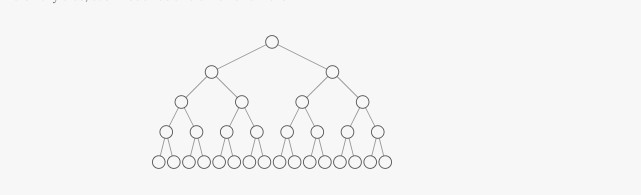

The tree above is special because each "level" or "tier" of the tree is full. There aren't any gaps. We call such a tree "**perfect.**"

One question we might ask is, if there are n nodes in total , what's the tree's height ($h$)? In other words, how many levels does the tree have?

If we count the number of nodes on each level, we can notice that it successively doubles as we go:

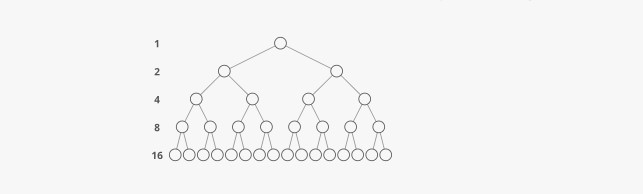

That brings back our refrain, "how many times must we double 1 to get to $n$." But this time, we're not doubling 1 to get to $n$ is the total number of nodes in the tree. We're doubling 1 until we get to . . . the number of nodes on the last level of the tree.

How many nodes does the last level have? Look back at the diagram above.

The last level has about half of the total number of nodes on the tree. If you add up the number of nodes on all the levels except the last one, you get about the number of nodes on the last level—1 less.

$$1+2+4+8=15$$

The exact formula for the number of nodes on the last level is:

$$\frac{n+1}2$$

> Where does the +1 come from?<br><br>The number of nodes in our perfect binary tree is always odd. We know this because the first level always has 1 node, and the other levels always have an even number of nodes. Adding a bunch of even numbers always gives us an even number, and adding 1 to that result always gives us an odd number.<br><br>
Taking half of an odd number gives us a fraction. So if the last level had exactly half of our $n$ nodes, it would have to have a "half-node." But that's not a thing.<br><br>Instead, it has the "rounded up" version of half of our odd n nodes. In other words, it has the exact half of the one-greater-and-thus-even number of nodes $n+1$. Hence $$\frac{n+1}2$$


So our height ($h$) is roughly "the number of times we have to double 1 to get to $\frac{n+1}{2}$." We can phrase this as a logarithm:

$$
h \approx \log_{2}{(\frac{n+1}{2})}
$$

One adjustment: Consider a perfect, 2-level tree. There are 2 levels overall, but the "number of times we have to double 1 to get to 2" is just 1 . Our height is in fact one more than our number of doublings. So we add 1:

$$
h = \log_{2}{(\frac{n+1}{2})} + 1
$$

We can apply some of our logarithm rules to simplify this:

$$
h = \log_{2}{(\frac{n+1}{2})} + 1
$$

$$
h = \log_{2}{(n+1)} - \log_{2}{(2)} + 1
$$

$$
h = \log_{2}{(n+1)} - 1 + 1
$$

$$
h = \log_{2}{(n+1)}
$$

## **Conventions with bases**

Sometimes people don't include a base. In computer science, it's usually implied that the base is 2. So log $n$ generally means $\log_{2}n$.

> Some folks might remember that in most other maths, an unspecified base is implied to be 10. Or sometimes the special constant $e$. (Don't worry if you don't know what $e$ is.)

There's a specific notation for log base 2 that's sometimes used: $lg$. So we could say $lg\ n$, or $n\ lg\ n$ (which comes up a lot in **sorting**). We use this notation a lot on Interview Cake, but it's worth noting that not everyone uses it.

> Some folks might know there's a similar-ish specific notation for log base e: $ln$ (pronounced "natural log").

In big O notation the base is considered a constant. So folks usually don't include it. People usually say $O(log\ n)$, not $O(log_2\ n)$,

But people might still use the special notation $lg\ n$, as in $O(lg\ n)$. It saves us from having to write an "o" :)

<br><br>
<div align='center'>
  <table>
    <tr>
      <td>
        <!-- <a href="https://github.com/SaifRasool92"> -->
          <img src="https://avatars.githubusercontent.com/u/170190067?v=4" width="300" alt="Saif Ur Rasool"/><br>
          <!-- <div align='center'>
            <sub><b>Saif Ur Rasool</b></sub>
          </div> -->
        </a>
      </td>
      <td>
        <h1><u>Created by Saif Ur Rasool</u> </h1>
        <br>
        <h6><bold>Professional Profiles:</bold></h6>
        <a href='https://www.linkedin.com/in/saif-ur-rasool/'>Linkedin</a>
        &nbsp;&nbsp;
        <a href='https://github.com/SaifRasool92'>Github</a>
        &nbsp;&nbsp;
        <a href='https://leetcode.com/u/Saif_Rasool/'>Leetcode</a>
        &nbsp;&nbsp;
        <a href='https://monkeytype.com/profile/Saif_ur_Rasool'>Monkeytype</a>
        &nbsp;&nbsp;
        <a href='https://lablab.ai/u/@Saif_123'>Lablab</a>
        &nbsp;&nbsp;
        <a href='https://www.behance.net/saifrasool2'>Behance</a>
        &nbsp;&nbsp;
        <br><br>
        <a href='https://www.duolingo.com/profile/SaifUrRasool'>Duolingo</a>
        <br><br>
        <h6>Certificates:</h6>
        <a href='https://digitalcredential.stanford.edu/check/09E8FB28F122CE1CB9A59536C67B8BE8508A5898A71233B6641137391929242FSm9lSGxRQXdrNk0zc215OFdac2Z6aGFTNFhTTC84VkNCbWZVb3NYOXZHQ1liQlVN'>SL @Stanford Code In Place '25</a>
        &nbsp;&nbsp;
        <a href='https://certificates.cs50.io/a9fa79dc-ae41-4317-9925-c7734bf4255d.pdf?size=letter'>Harvard CS50x Puzzle Day Winner '25</a>
        <br><br>
        <h6>Courses Taught:</h6>
        <a href='https://github.com/SaifRasool92/5PM_Python-Crash_Course_23th_June'>Python Crash Course</a>
      </td>
    </tr>
</table>
</div>